In [1]:
from scipy.odr import RealData, ODR, quadratic
import numpy as np

In [129]:
data = RealData(x=[30, 40, 50, 45], y=[34.1, 36.3, 30.0, 33], sy=[0.01, 1e-10, 1e-10, 1e-10])

In [130]:
odr = ODR(data, quadratic)

In [131]:
odr.run()

In [132]:
odr.output.pprint()

Beta: [ -0.04642334   3.45927758 -27.83564496]
Beta Std Error: [  9.35615094e-03   7.21619133e-01   1.39222612e+01]
Beta Covariance: [[  4.73825682e-05  -3.63539880e-03   6.89217295e-02]
 [ -3.63539880e-03   2.81864406e-01  -5.40452117e+00]
 [  6.89217295e-02  -5.40452117e+00   1.04916480e+02]]
Residual Variance: 1.8474633988396627
Inverse Condition #: 1.232170946471267e-05
Reason(s) for Halting:
  Parameter convergence


In [39]:
B = odr.output.beta; print(f'B = {B}')
# S = np.sqrt(np.diag(odr.output.cov_beta)); print(f'S = {S}')
S = odr.output.sd_beta; print(f'S = {S}')

B = [ -0.0425   3.195  -23.5   ]
S = [  5.52228496e-16   4.27476596e-14   8.33387791e-13]


In [123]:
maxloc = -B[1]/(2*B[0]); maxloc

37.077565632452405

In [124]:
maxunc = np.sqrt(B[1]**2/(4*B[0]**4)*S[0]**2+(1/(4*B[0]**2))**2*S[1]**2); maxunc

0.71096052207882976

In [118]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

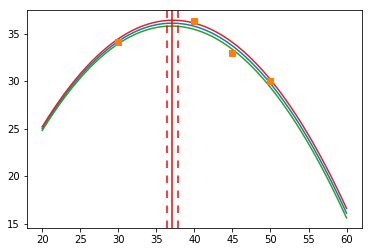

In [125]:
x = np.arange(20, 60, 0.01)
plt.plot(x, quadratic.fcn(B, x))
plt.errorbar(data.x, data.y, yerr=data.sy, fmt='s')
plt.plot(x, quadratic.fcn(B - S, x))
plt.plot(x, quadratic.fcn(B + S, x))
plt.axvline(maxloc, color='r')
plt.axvline(maxloc - maxunc, color='r', dashes=[5,5])
plt.axvline(maxloc + maxunc, color='r', dashes=[5,5])

In [133]:
X = np.matrix([[x**2, x, 1] for x in data.x])
Sy = np.diag([s**2 for s in data.sy])
y = np.array(data.y)

In [134]:
B = X.T.dot(X).I.dot(X.T).dot(y).A[0]; print(f'B = {B}')
S = np.sqrt(np.diag(X.T.dot(X).I.dot(X.T).dot(Sy).dot(X).dot(X.T.dot(X).I))); print(f'S = {S}')

B = [ -0.03809091   2.82463636 -16.26909091]
S = [  4.54545455e-05   4.11818182e-03   9.25454545e-02]
